# Redes Neurais

## Introdução

Nesta pasta da biblioteca do TensorFlow, veremos como criar redes neurais. Como a introdução será grande, então vamos dividí-la em subseções.

A menor unidade de uma rede é o **neurônio**, que recebe os dados, e cada tipo de dado possui um **peso** ("importância"). 

**O aprendizado da rede se dá pelo ajuste desses pesos**, e essa ideia será retomada algumas vezes ao longo deste notebook. 

### Função de Ativação

Cada neurônio é dotado de uma **função de ativação**. As funções de ativação costumam ser as seguintes, considerando $x$ como a soma ponderada das entradas:


* **Threshold**: esta é a função degrau $f(x)$ que é $0$ se $x<0$ e $1$ se $x \geq 0$.

Text(0.5, 1.0, 'Função Threshold (degrau)')

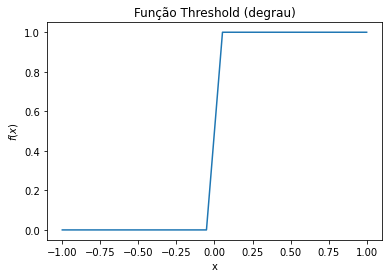

In [2]:
from numpy import linspace, heaviside
from pylab import legend, title, xlabel, ylabel, plot

x = linspace(-1,1,20)
y = heaviside(x,1)

plot(x,y)
xlabel('x')
ylabel('$f(x)$')
title('Função Threshold (degrau)')

* **Sigmoid**: ela costuma ser usada em modelos de regressão logistica, e nas camadas de saída (este conceito será explicado depois). A função é dada por

$  \LARGE f(x) = \frac{1}{1 + e^{-x}} $.

Text(0.5, 1.0, 'Função Sigmoid')

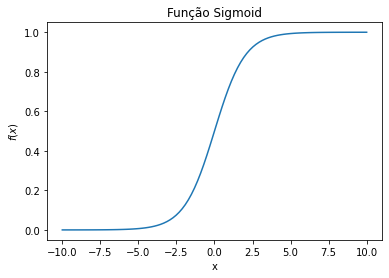

In [5]:
from numpy import e

x = linspace(-10,10,100)
y = 1/(1 + e**(-x))

plot(x,y)

xlabel('x')
ylabel('$f(x)$')
title('Função Sigmoid')

* **Relu**: é uma abreviação para "Rectified linear unit", que é uma função $f(x) = 0$ se $x \leq 0$ e $f(x) = x$ se $x > 0$. 

Text(0.5, 1.0, 'Função Relu')

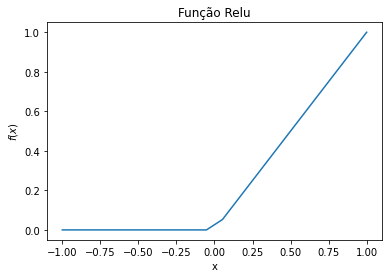

In [7]:
from numpy import maximum

def relu(x):
    return maximum(0,x)

x = linspace(-1,1,20)
y = relu(x)

plot(x,y)

xlabel('x')
ylabel('$f(x)$')
title('Função Relu')

* **Tangente Hiperbólica**: como o próprio nome diz, essa é a função tangente hiperbólica dada por

$\Large f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$.

Text(0.5, 1.0, 'Tangente Hiperbólica')

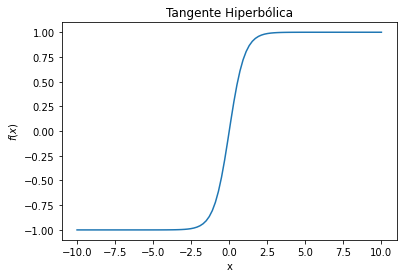

In [11]:
from numpy import tanh

x = linspace(-10,10,100)
y = tanh(x)

plot(x,y)

xlabel('x')
ylabel('$f(x)$')
title('Tangente Hiperbólica')

Obs: embora seja muito parecida com a sigmoide, a tangente hiperbólica pode assumir valores negativos, enquanto que a sigmoide não.

### Estrutura de uma rede

Agora que vimos o que há dentro de cada neurônio, vejamos como se dá a estrutura de uma rede neural. As redes costumas estar organizadas em

* **Camada de entrada**: constituída de atributos;

* **Camadas Ocultas**: constituída pelos neurônios;

* **Camada de Saída**: constituída de neurônios. O número de neurônios é igual ao número de resultados (classes) possíveis.

Em geral, o número de neurônios necessŕios para construir a rede é dado pela relação $(a+b)/2$, onde $a$ é a quantidade de atributos (característica), e $b$ é a quantidade de classes (resultados possíveis).

Uma vez que todos os registros passaram pela rede, dizemos que uma **epoch** foi completa. Quando isso ocorre, "entra em cena" a chamada **função de custo/prejuízo**, que avalia a diferença entre a previsão e o valor real. Um exemplo desse tipo de função é o RMS - root mean square.

Uma vez calculado o erro, a rede atualiza os pesos, e isso ocorre a cada epoch.

Até achar os melhores pesos, o método usado para atualizar a cada epoch é o **Gradient Descent**, que usa o gradiente - vide cálculo de várias variáveis - para achar um ponto de extremo que minimize os erros. Esse método funciona bem para funções com concavidade para cima. Para funções que não tem essa propriedade, é usado o **Stochastic Gradient Descent**.


Descrevendo o funcionamento dessa maneira, temos a impressão de que o modelo fica viciado no sentido de que - depois de várias epochs - ele fica super-ajustado aos dados de treino apenas. Contudo, a rede possui formas de evitar esse super-ajuste chamadas de **Regularização**. A técnica de Regularização mais conhecida é o **dropout**, onde um ou mais neurônios são descartados.

Agora que vimos o que é uma rede neural e suas características, vamos aplicá-lo na prática com os dados do Iris.

## Dados Iniciais